# Simple wine classificator

In [40]:
# Version 1
# original: https://compscicenter.ru/courses/data-mining-python2/2018-autumn/classes/3999/

In [70]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [56]:
wine = pd.read_csv("wine_ds.csv", sep=",", header=0)
wine.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [57]:
wine['Class'].value_counts(normalize=True)

2    0.398876
0    0.331461
1    0.269663
Name: Class, dtype: float64

In [58]:
# shuffle dataset
dataset = wine.sample(frac=1)
dataset.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD,Proline,Class
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510,2
144,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855,1
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [59]:
# prepare datasets
test_index = int(len(dataset) * 0.8)
x_train = wine[:test_index].drop('Class', axis=1).values
x_test = wine[test_index:].drop('Class', axis=1).values
y_train = (wine[:test_index])['Class'].values
y_test = (wine[test_index:])['Class'].values

In [60]:
# normalize targets
y_train_bin = to_categorical(y_train, num_classes=3)
y_test_bin = to_categorical(y_test, num_classes=3)

In [61]:
# create model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(13,)))
model.add(layers.Dense(11, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))
model.compile(optimizer="Adam", 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [62]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 11)                154       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 36        
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, 
                    y_train_bin,
                    epochs=22,
                    batch_size=22)

In [113]:
model.evaluate(x_test, y_test_bin)

36/36 [==============================] - 0s 435us/sample - loss: 0.0492 - accuracy: 0.9722


[0.04917189794893299, 0.9722222]

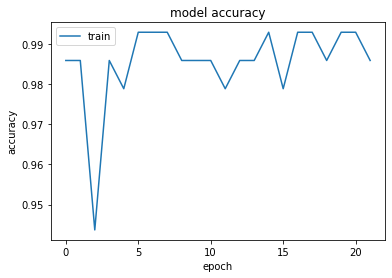

In [112]:
# visualization
plt.figure()   
plt.plot(history.history['accuracy'])   
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  